# EDA Pingüinos - Palmer

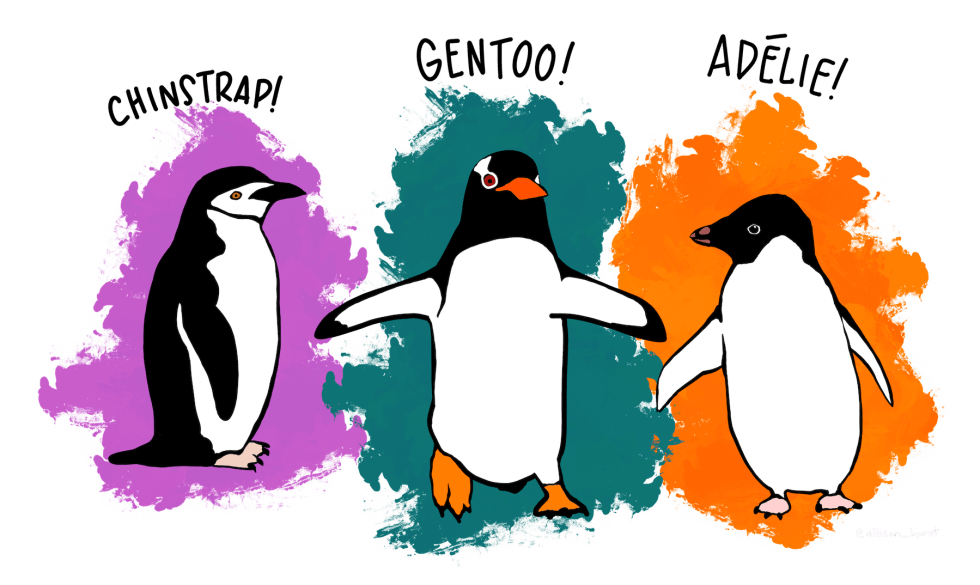

https://github.com/allisonhorst/palmerpenguins/blob/main/README.md

## Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Variables

In [ ]:
alpha = 0.05

## Carga de Datos

In [ ]:
df = pd.read_csv('penguins_size.csv')

## Primera Exploración

In [ ]:
df.head()

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.describe(include="all")

In [ ]:
df['sex'].unique()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
sns.pairplot(df, kind='scatter', hue='species',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

## Hipótesis

### Estadísticas

1. Tamaño y Sexo
2. Especie y Caracteristica Fisica
3. Aleta y Masa Corporal
4. Distribución de Normalidad

### Gráficamente

1. Distribución de las Características por Isla
2. Relación entre Longitud y Profundidad del Pico
3. Interacción entre Especies, Islas y Características Físicas
4. Gráfico de Normalidad

## Limpieza

In [ ]:
df['sex'].replace('.',np.nan,inplace=True)

In [ ]:
df['sex'].unique()

In [ ]:
# En esta caso, podriamos imputar el valor de la media/mediana a los valores cuantitativos que falta
# Sexo es una variable cualitativa, por lo tanto no tiene sentido utilizar la media/mediana para imputar el valor
# Con modelos de ML, podríamos estimar la probabilidad del sexo de los pinguinos según el resto de los valores 
df1 =df[(df['culmen_length_mm'].isna()) | (df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna())]
df1

In [ ]:
stats_df = df.groupby(["species", "island"])[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']].mean()

In [ ]:
stats_df

In [ ]:
# Usar para el resto de NaN, excepto sexo
for v in df.columns[df.dtypes == float]:
    df[v] = df.groupby(["species", "island"])[v].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.info()

## Analisis

### Analsis Univariante

In [ ]:
# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly as pl
plt.figure(figsize=(10,5))
l = go.Histogram(x=df['culmen_length_mm'], name="culmen_length_mm", nbinsx=300)
layout = go.Layout()
fig = go.Figure(data=l, layout=layout)
iplot(fig)

In [ ]:
df["culmen_length_mm"].value_counts()

### Analisis Bivariante

In [ ]:
df.columns

In [ ]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm',hue='species');
sns.regplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, scatter=False, color='red');

for group in df['species'].unique():
    sns.regplot(x='culmen_length_mm', y='culmen_depth_mm', data=df[df['species'] == group], scatter=False, label=f'Reg: {group}')

In [ ]:
sns.jointplot(data=df, x='flipper_length_mm', y='body_mass_g', kind='hex');

se muestra en el grafico de arriba que blablabla..

### Multivariante

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## Hipótesis Desarrolo

1. Tamaño y Sexo
2. Especie y Caracteristica Fisica
3. Aleta y Masa Corporal
4. Distribución de Normalidad

1. Tamaño vs Sexo ----> T de Student

**H0**: No hay evidencia significativa en la masa corporal entre sexos de los pingüinos.

**H1**: Existe una diferencia significativa entre la masa corporal entre sexos de los pingüinos.

2. Especie vs Caracteristicas Fisicas ----> ANOVA

**H0**: No hay diferencias significativas en la longitud del pico entre las diferentes especies de pingüinos.

**H1** : Existe una diferencia significativa entre la longitud del pico entre las diferentes especies de pingüinos.

3. Aleta vs Masa Corporal ----> Correlación de Pearson

**H0**: No hay correlación entre la longitud de la aleta y la masa corporal de los pingüinos.

**H1**: Existe una diferencia significativa entre la longitud de la aleta y la masa corporal de los pingüinos.

4. Normalidad ----> Shapiro-Wilk o D'Agostino's K-squared.

**H0**: La distribución de las columnas numéricas sigue una distribución normal.

**H1**: La distribución de las columnas numéricas NO sigue una distribución normal.

In [ ]:
df.columns

In [ ]:
df

In [ ]:
# 1.

p_h = df[df['sex']=='MALE']['body_mass_g']
p_m = df[df['sex']=='FEMALE']['body_mass_g']

ttest = stats.ttest_ind(p_h, p_m)
ttest



In [ ]:
p_m

In [ ]:
df_ = pd.DataFrame()
df_['male'] = p_h[p_h.notnull()].values[0:165]
df_['females'] =p_m[p_m.notnull()].values[0:165]

In [ ]:
df_.mean()

In [ ]:
sns.kdeplot(df_, fill=True);


In [ ]:
if ttest[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la masa corporal entre sexos de los pingüino"')
else:
    print('No rechazamos la hipótesis nula')

In [ ]:
#2. 

grupos_especies = df.groupby('species')['culmen_length_mm']
adelie = grupos_especies.get_group('Adelie')
chinstrap = grupos_especies.get_group('Chinstrap')
gentoo = grupos_especies.get_group('Gentoo')

anova = stats.f_oneway(adelie, chinstrap, gentoo)
anova

if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la longitud del pico entre las diferentes especies de los pingüinos"')
else:
    print('No rechazamos la hipótesis nula')

In [ ]:
#3. 

aleta = df['flipper_length_mm']
masa = df['body_mass_g']

correlacion , pv = stats.pearsonr(aleta, masa)
correlacion, pv

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre la longitud del pico y la masa corporal"')
else:
    print('No rechazamos la hipótesis nula')

In [ ]:
#4.

variables_num = df.select_dtypes(exclude='object')

shapiro = {var: stats.shapiro(variables_num[var]) for var in variables_num.columns}
print(shapiro)

for var in variables_num.columns:
    if shapiro[var][1] < 0.05:
        print(f'Rechazamos la hipótesis nula "No Hay evidencia significativa en la normalidad de la variable {var}"')
    else:
        print(f'No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable {var}"')

1. Distribución de las Características por Isla
2. Relación entre Longitud y Profundidad del Pico
3. Interacción entre Especies, Islas y Características Físicas
4. Gráfico de Normalidad

In [ ]:
#1.

sns.boxplot(x='island', y='culmen_length_mm', data=df)
plt.title('Distribución de Culmen Length por Isla')
plt.show()

In [ ]:
#2.

sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df)
plt.title('Relación entre Culmen Length y Culmen Depth por Especie')

In [ ]:
#4.
from scipy.stats import probplot

for i in df.select_dtypes(exclude=object):
    # Histograma con curva de densidad
    sns.histplot(df[i], kde=True)
    plt.title(f'{i}')
    plt.show()

    # Q-Q plot
    probplot(df[i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {i}')
    plt.show()


In [ ]:
#3.

sns.violinplot(x='species', y='culmen_length_mm', hue='island', data=df, split=True)
plt.title('Distribución de Culmen Length por Especie e Isla')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

size = df['flipper_length_mm']

sns.scatterplot(data=df, x='culmen_length_mm', y='body_mass_g', 
                size=size, hue='island', style='species', sizes=(20, 200))

plt.title('Relación entre Culmen Length y Body Mass por Especie e Isla')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [3]:
import xport
import pandas as pd

In [6]:
pd.read_sas("BMX.XPT")['BMXWT']

0       12.5
1       75.4
2       32.9
3       13.3
4       92.5
        ... 
9277    66.4
9278    83.1
9279    18.5
9280    32.8
9281    57.9
Name: BMXWT, Length: 9282, dtype: float64

In [ ]:

with open('DEMO.XPT', 'rb') as f:
    for row in xport.Reader(f):
        print(pd.DataFrame(row))

In [ ]:
row